# First bar - 5m - Analytics

### Import Library

In [130]:
import numpy as np
import pandas as pd
import numpy as np
import pandas_ta as ta
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120
import warnings
warnings.filterwarnings('ignore')

### Load Price Data

In [131]:
import os
from pathlib import Path
notebook_path = os.getcwd()
algo_dir = Path(notebook_path).parent.parent
csv_file = str(algo_dir) + '/vn-stock-data/VN30ps/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [132]:
data = dataset.copy()

In [133]:
data = data[data.index > '2020-11-01 00:00:00']

In [134]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2020-11-02 09:00:00,900.1,900.2,899.3,900.1,1910
2020-11-02 09:05:00,900.2,900.2,898.7,899.4,1670
2020-11-02 09:10:00,899.5,900.0,899.0,899.5,1329
2020-11-02 09:15:00,899.4,899.5,898.2,898.6,1722
2020-11-02 09:20:00,898.5,898.6,896.5,898.2,2939
...,...,...,...,...,...
2024-11-12 14:15:00,1306.4,1309.4,1304.6,1304.7,8733
2024-11-12 14:20:00,1304.7,1307.4,1302.7,1306.5,10758
2024-11-12 14:25:00,1306.9,1309.4,1306.2,1309.1,9066


In [135]:
def bar9h(tick):
    tick=tick[(tick.index.hour == 9) & (tick.index.minute == 0)]
    if len(tick):
        return tick[0]

In [136]:
data['Low_9h'] = data['Low']
data['High_9h'] = data['High']
data['Close_9h'] = data['Close']
day_data = data.resample('D').agg({
        'Open': 'first',
        'Close': 'last',
        'High': 'max',
        'Low': 'min',
        'Low_9h': bar9h,
        'High_9h': bar9h,
        'Close_9h': bar9h
    })
day_data.dropna(subset=['Close'], inplace=True)

In [137]:
day_data

,Open,Close,High,Low,Low_9h,High_9h,Close_9h
Date,,,,,,,
2020-11-02,900.1,904.0,907.0,895.4,899.3,900.2,900.1
2020-11-03,909.3,908.3,910.8,903.7,908.5,909.4,908.8
2020-11-04,909.0,912.3,918.1,906.7,908.8,909.9,908.9
2020-11-05,913.7,910.2,919.9,910.0,913.6,914.7,913.6
2020-11-06,911.2,908.3,912.7,903.3,911.2,912.0,911.9
...,...,...,...,...,...,...,...
2024-11-06,1325.0,1341.0,1341.0,1324.0,1324.0,1325.4,1324.9
2024-11-07,1342.0,1334.7,1343.6,1333.8,1341.8,1343.6,1342.7
2024-11-08,1337.5,1324.0,1340.3,1318.3,1337.0,1338.4,1338.2


### Open 9h == High 9h

In [138]:
open_equal_high_9h = day_data[day_data.Open == day_data.High_9h]

In [139]:
# Short return
open_equal_high_9h['reward'] = (open_equal_high_9h['Close_9h'] - open_equal_high_9h['Low'])

In [140]:
open_equal_high_9h['reward']

Date
2020-11-11     9.8
2020-11-18     8.0
2020-12-03     0.3
2020-12-17     6.4
2020-12-30     2.1
              ... 
2024-10-24    15.8
2024-10-28     2.0
2024-11-01    11.2
2024-11-04    13.4
2024-11-11    16.3
Name: reward, Length: 140, dtype: float64

In [141]:
open_equal_high_9h['reward'].mean()

12.131428571428579

In [142]:
open_equal_high_9h['reward'].sum()

1698.400000000001

In [143]:
# Risk
open_equal_high_9h['risk'] = open_equal_high_9h['Close_9h'] - open_equal_high_9h['High']

In [144]:
open_equal_high_9h['risk']

Date
2020-11-11    -0.8
2020-11-18    -4.3
2020-12-03    -8.1
2020-12-17    -9.3
2020-12-30   -12.2
              ... 
2024-10-24    -2.2
2024-10-28    -3.1
2024-11-01    -2.6
2024-11-04    -2.3
2024-11-11    -1.2
Name: risk, Length: 140, dtype: float64

In [145]:
open_equal_high_9h['risk'].mean()

-7.713571428571439

In [146]:
open_equal_high_9h['risk'].sum()

-1079.9000000000015

In [147]:
# Max risk
open_equal_high_9h['risk'].min()

-73.59999999999991

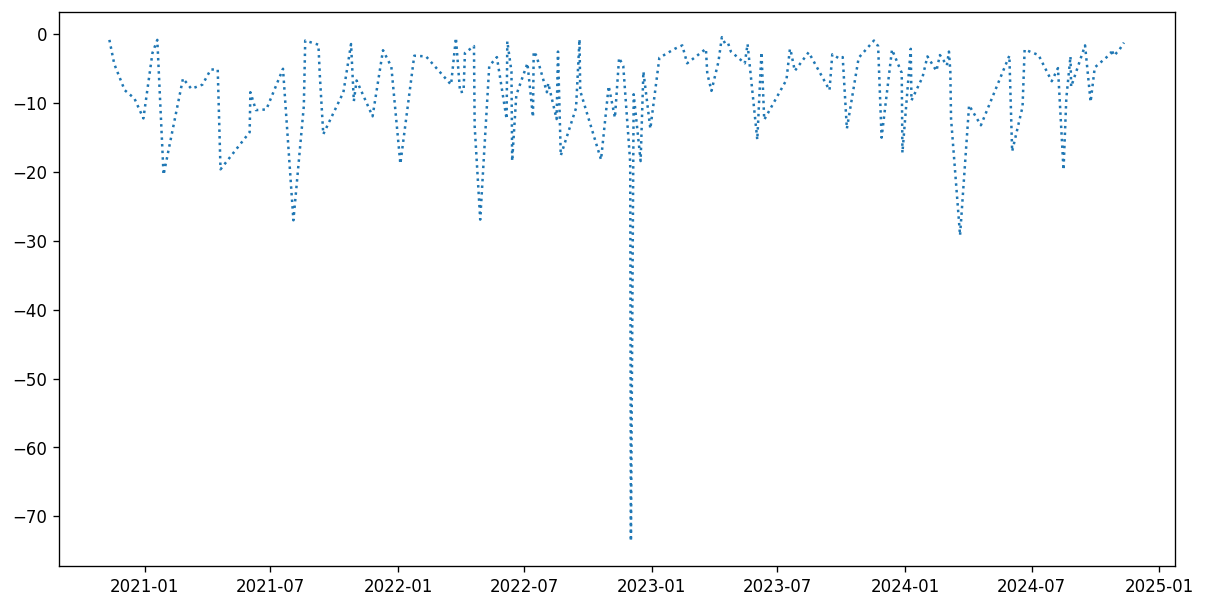

In [148]:
plt.plot(open_equal_high_9h['risk'], linestyle = 'dotted')

In [149]:
len(open_equal_high_9h[open_equal_high_9h.risk > -3]['risk'])

39

In [150]:
# So ngay Open = High_9h
len(open_equal_high_9h)

140

In [151]:
# Nhung ngay co the Short ngay tu 9h5
short_day = open_equal_high_9h[open_equal_high_9h.Close_9h > open_equal_high_9h.High - 3.5]

In [152]:
len(short_day)

53

In [153]:
short_day['reward'].mean()

16.63207547169813

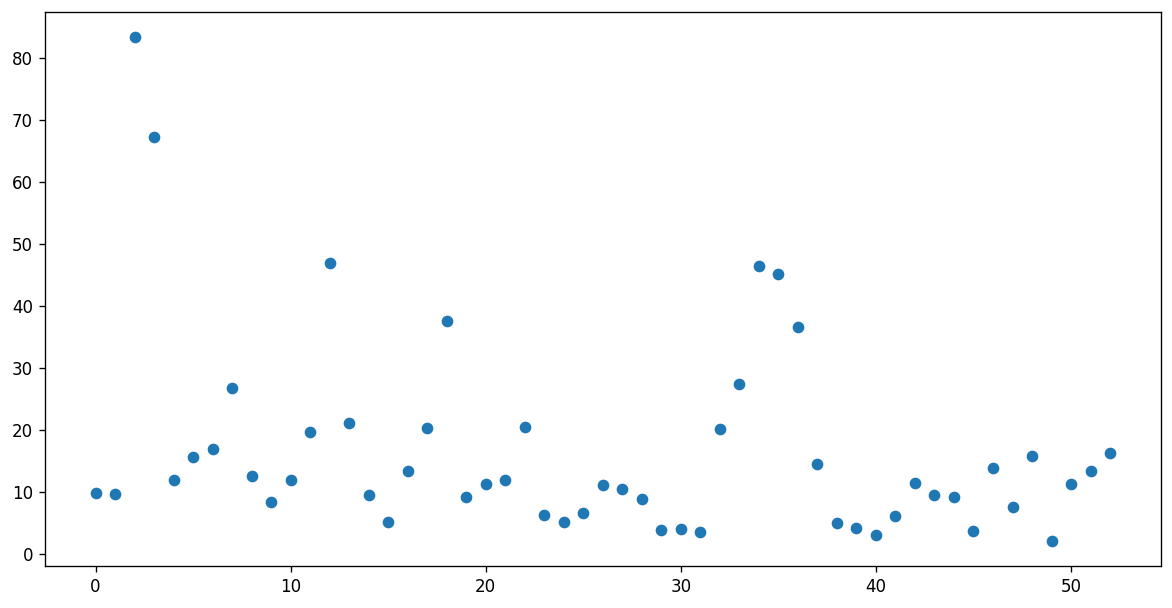

In [154]:
plt.scatter(range(0, len(short_day['reward'])), short_day['reward'])

### Open 9h == Low 9h

In [155]:
open_equal_low_9h = day_data[day_data.Open == day_data.Low_9h]

In [156]:
# So ngay Open 9h = Low 9h
len(open_equal_low_9h)

170

In [157]:
# Long return
open_equal_low_9h['reward'] = (open_equal_low_9h['High'] - open_equal_low_9h['Close_9h'])
open_equal_low_9h['reward']

Date
2020-11-06     0.8
2020-11-12     6.1
2020-11-19     9.7
2020-11-20     2.7
2020-11-23     7.4
              ... 
2024-08-28     2.5
2024-10-01    12.3
2024-10-09    13.6
2024-10-15     7.6
2024-10-29     5.6
Name: reward, Length: 170, dtype: float64

In [158]:
open_equal_low_9h['reward'].sum()

1536.6000000000026

In [159]:
open_equal_low_9h['reward'].mean()

9.038823529411781

In [160]:
# Risk
open_equal_low_9h['risk'] = open_equal_low_9h['Low'] - open_equal_low_9h['Close_9h']

In [161]:
open_equal_low_9h['risk'].mean()

-9.723529411764705

In [162]:
open_equal_low_9h['risk'].sum()

-1653.0

In [163]:
# Max risk
open_equal_low_9h['risk'].min()

-63.200000000000045

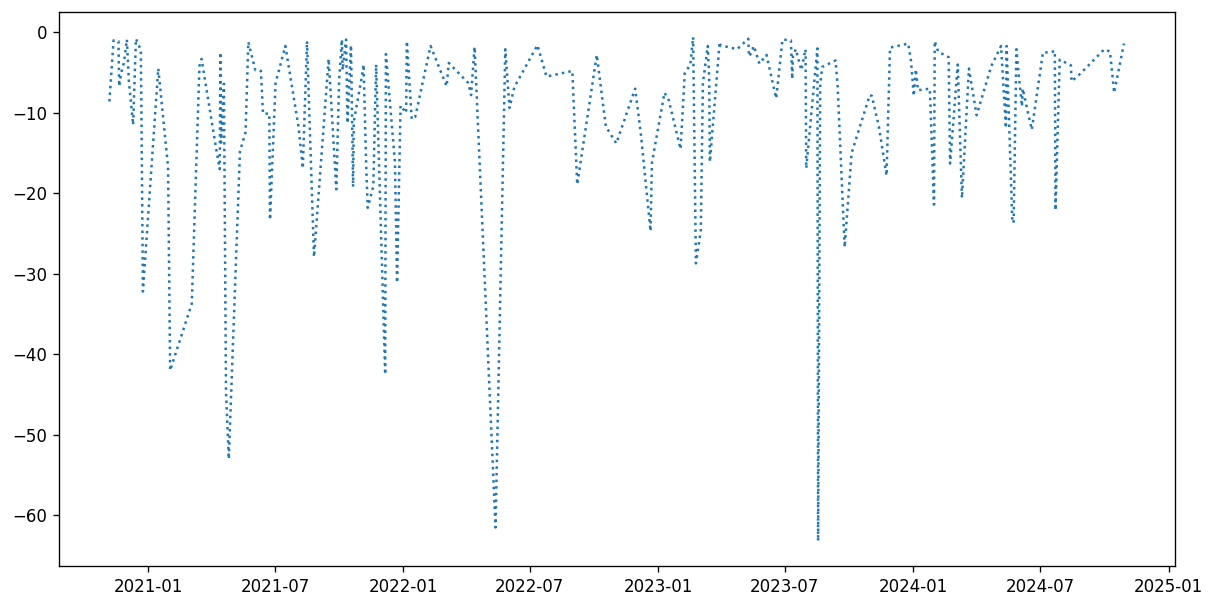

In [164]:
plt.plot(open_equal_low_9h['risk'], linestyle = 'dotted')

In [169]:
# Nhung ngay co the Long ngay tu 9h5
long_day = open_equal_low_9h[open_equal_low_9h.Close_9h < open_equal_low_9h.Low + 3]

In [170]:
len(long_day)

49

In [167]:
long_day['reward'].mean()

12.450000000000008

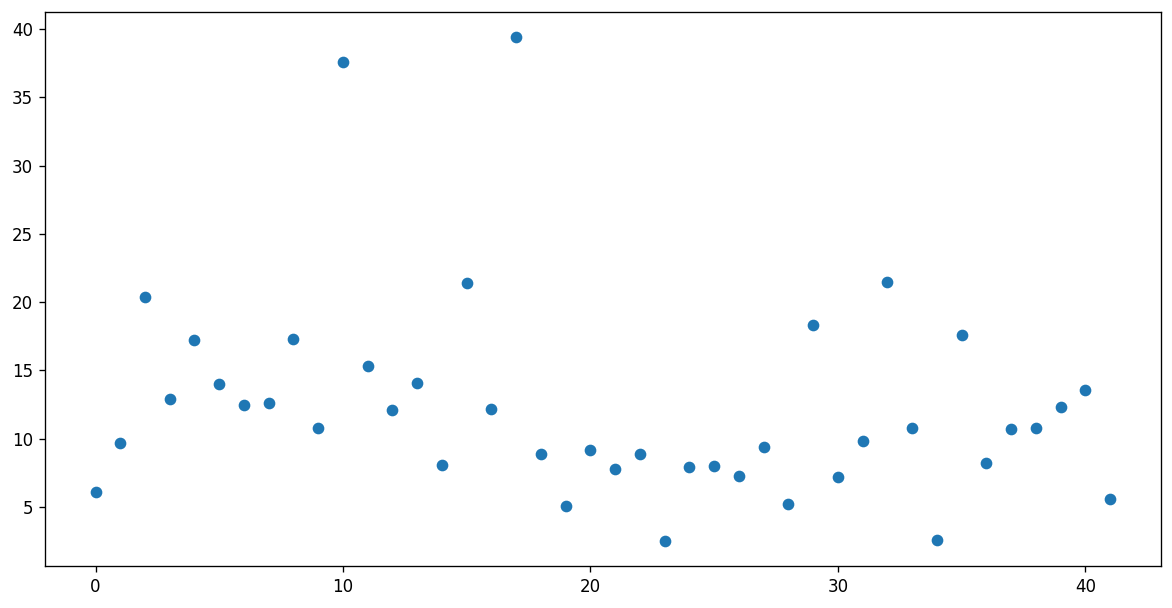

In [168]:
plt.scatter(range(0, len(long_day['reward'])), long_day['reward'])